<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning Avanzado
*2 de Diciembre de 2024*

#### Integrantes: 
` Vicente Gallardo, Giuseppe Lavarello`

## 1. Objetivo

El objetivo de este laboratorio es ajustar redes neuronales convolucionales según lo aprendido en clase para desarrollar un análisis de datos.

Para esto, se trabajará con la base de **Chihuahuas vs Muffins** disponible en **Kaggle** ([enlace al dataset](https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification)) y se realizará lo siguiente:

1. Implementar un modelo de Perceptrón Multicapa (MLP) para la clasificación de las imágenes.  
2. Implementar y ajustar dos arquitecturas diferentes de Redes Neuronales Convolucionales (CNN).  
3. Comparar los resultados entre el MLP y las CNN en términos de precisión y desempeño general.  



## 2. Introducción

En el ámbito de la ciencia de datos y el aprendizaje profundo, la clasificación de imágenes es un problema comun con amplias aplicaciones prácticas, como el reconocimiento facial, la detección de objetos y el diagnóstico médico. Este laboratorio aborda el desafío de clasificar imágenes en dos categorías visualmente similares: **chihuahuas** y **muffins**. 

Para esto se utilizará el conjunto de datos **Chihuahuas vs Muffins** de Kaggle, que proporciona imágenes etiquetadas para entrenar y evaluar modelos de clasificación.

En este informe, se comparará el desempeño de un modelo de Perceptrón Multicapa (MLP) con dos arquitecturas diferentes de redes convolucionales, evaluando métricas clave como precisión y robustez del modelo. Además, se explorará cómo cada enfoque aborda el desafío y se destacarán las fortalezas y limitaciones de las técnicas utilizadas.


## 3. Metodología 

1. Carga del Dataset:  
    -   Kaggle (Chihuahuas vs Muffins). 
    - División en conjuntos de entrenamiento, validación y prueba.   

2. Preprocesamiento:  
    - Exploración de imágenes.      


3. Modelos a implementar:   
    - Modelo 1: Perceptrón Multicapa (MLP).   
    - Modelo 2: Red Convolucional simple (CNN básica).   
    - Modelo 3: Red Convolucional más profunda con más capas convolucionales.   

4. Métricas de evaluación:   
    - Precisión (accuracy).   
    - Matriz de confusión.   
    - AUC-ROC.   

5. Interpretación de los resultados y conclusiones. 

### 3.1 Carga del Dataset

In [1]:
#Limpieza
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#Manejo de datos
import pandas as pd
import numpy as np
from collections import Counter

#Modelos y utiles
import tensorflow as tf
from keras import models, layers, optimizers, regularizers
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns


#metricas
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc


In [2]:
train_dir = r"/mnt/c/Users/Giuseppe/My documents/github/tarea2mla/data/train"
test_dir = r"/mnt/c/Users/Giuseppe/My documents/github/tarea2mla/data/test"

**Decisión**: Se definen los parámetros a utilizar en los modelos y para generar los sets de datos.  
El tamaño de las imágenes se establece en 150x150 píxeles para que el procesamiento no tome demasiado tiempo.


In [3]:
#parametros
activation = 'relu'  # Activación para las capas ocultas
learning_rate = 0.01  # Tasa de aprendizaje
batch_size = 8  # Tamaño de lote
epochs = 8 # Número de épocas
img_size = (150, 150)

In [4]:
# Carga y Separación en Validacion y training
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    labels='inferred',
    label_mode='int',
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)


Found 4733 files belonging to 2 classes.
Using 3787 files for training.


I0000 00:00:1733187047.559690  283549 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733187047.607395  283549 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733187047.607471  283549 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733187047.610233  283549 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733187047.610382  283549 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Found 4733 files belonging to 2 classes.
Using 946 files for validation.


In [5]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)
class_labels = test_data.class_names

Found 1184 files belonging to 2 classes.


### 3.2 Preprocesamiento

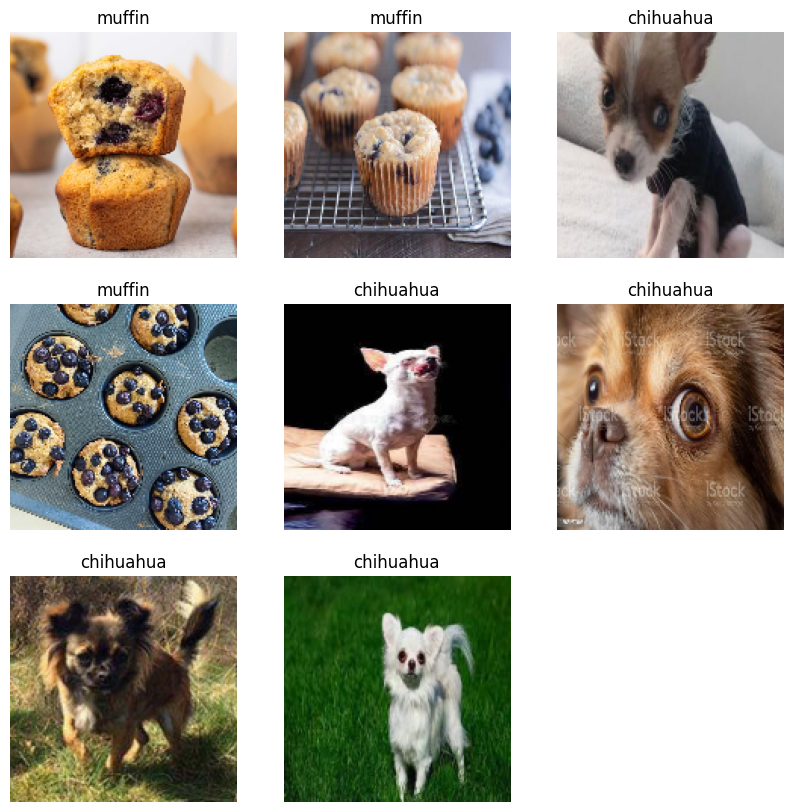

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[int(labels[i])])
        plt.axis("off")

**Vemos que las imagenes estan bien demarcadas**

**Requerimiento**: La mayoría de los modelos de TensorFlow están diseñados para ser utilizados con entradas entre 0 y 1.  
Por lo tanto, se normalizan los datos.


In [7]:
# Reescalamos la data entre 0 - 1
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

In [26]:

def plot_dist(data, name):
    
    class_counts = Counter()

    for _, labels in data:
        class_counts.update(labels.numpy())

    etiquetas = list(class_labels)
    conteos = list(class_counts.values())

    # Gráfico de Dona usando Matplotlib
    fig, axs = plt.subplots(1,2,figsize=(12, 6))
    plt.pie(
        conteos,
        labels=etiquetas,
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'skyblue'],  # Ajustar colores si es necesario
        wedgeprops=dict(width=0.3)
    )
    axs[0].bar(    
        height=conteos,
        x=etiquetas,
        color=['orange', 'skyblue']
        )
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['bottom'].set_visible(False)
    axs[0].spines['left'].set_visible(False)

    fig.suptitle('Distribución de Clases de ' + name)
    plt.show()




##### Distribución de la data

Se observa que está cerca del balance, por lo que no se tratará de aumentarla significativamente.


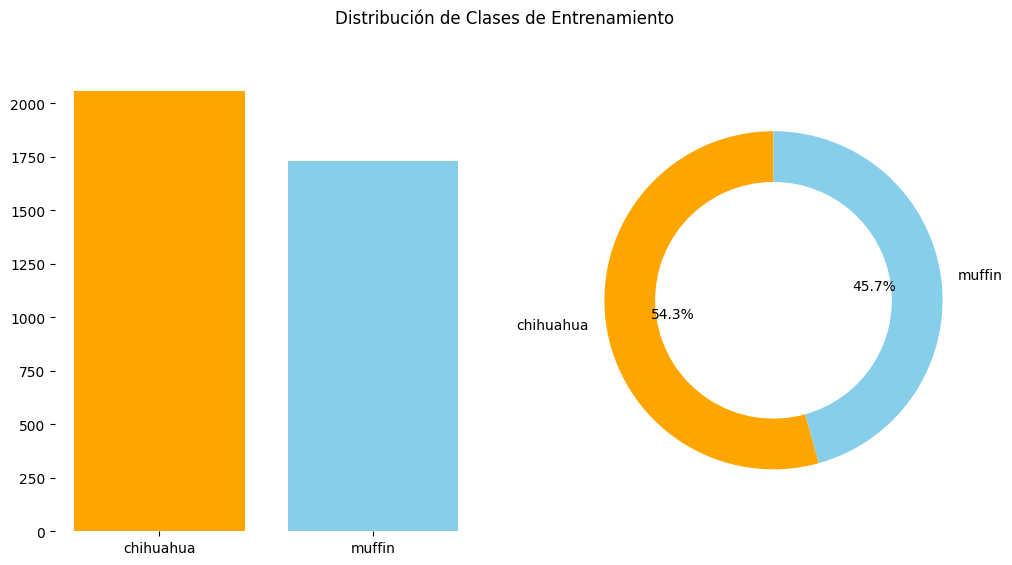

In [27]:
plot_dist(train_data, 'Entrenamiento')

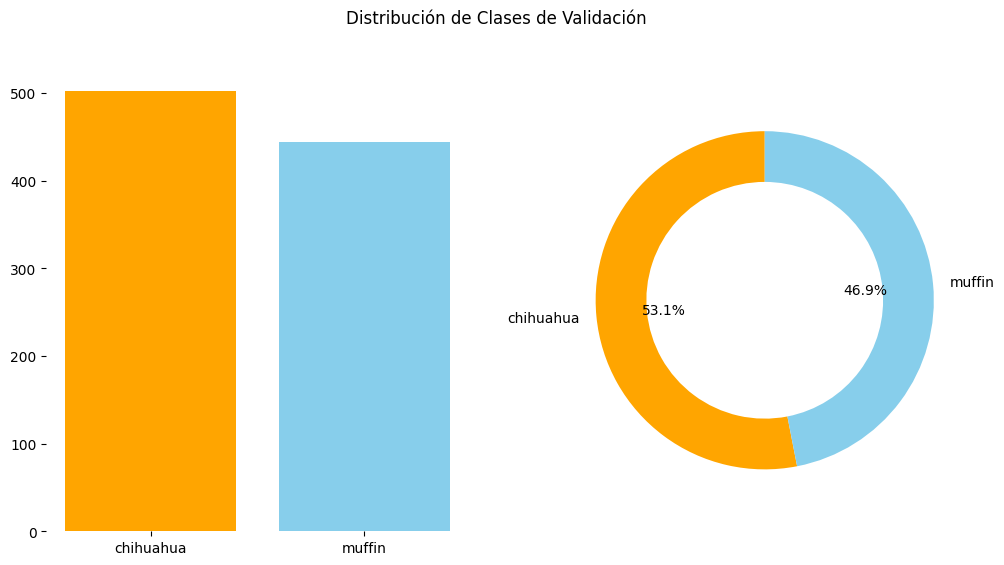

In [28]:
plot_dist(val_data, 'Validación')

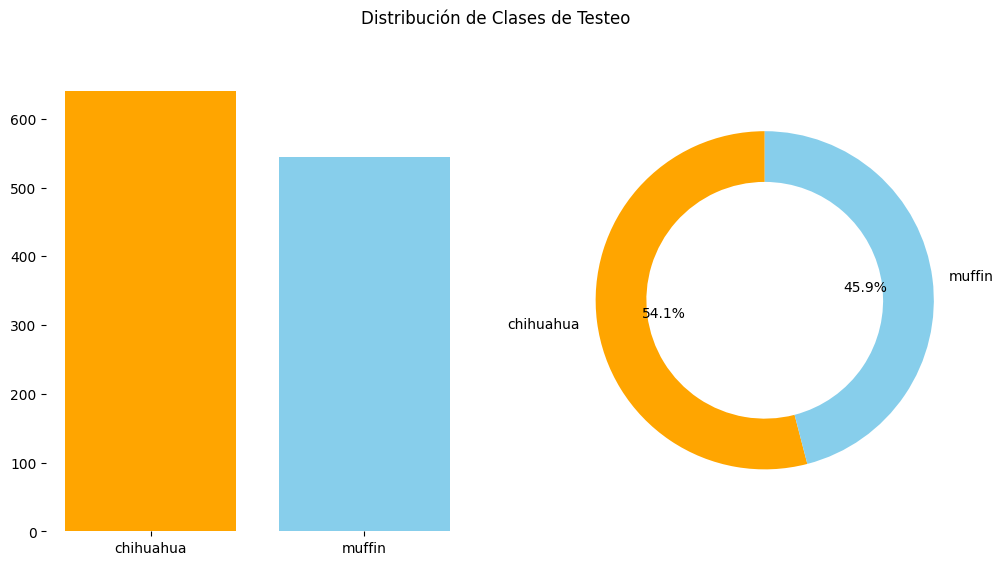

In [29]:
plot_dist(test_data, 'Testeo')

### 3.3 Modelos

In [12]:
def plot_training_history(history):
    # Gráfico de precisión
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.legend(loc='best')
    plt.title('Precisión a lo largo de las Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.show()

    # Gráfico de pérdida
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.legend(loc='best')
    plt.title('Pérdida a lo largo de las Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.show()

In [13]:

def metricas(modelo):
    # Obtener los valores a usar
    y_true = []
    y_pred = []
    y_pred_proba = []
    for image_batch, label_batch in test_data:
        # obtener predicción
        predictions = modelo.predict(image_batch, verbose=0)
        predicted_classes = np.argmax(predictions, axis=1)

        # asignar las etiquetas
        y_true.extend(label_batch.numpy())  # etiquetas verdaderas 
        y_pred.extend(predicted_classes)    # etiquetas predichas 
        y_pred_proba.extend(predictions)

    # Convertir a numpy para el plot
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_proba = np.array(y_pred_proba)

    # Matriz de confusion
    cm = confusion_matrix(y_true, y_pred)


    # Plot Matriz
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Etiquetas Predichas')
    plt.ylabel('Etiquetas Verdaderas')
    plt.title('Confusion Matrix')
    plt.show()

    # classification report
    print("Reporte de Clasificación:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # ROC curve y AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:,1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'curva ROC  (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal
    plt.xlabel('Ratio de Falsos Positivos')
    plt.ylabel('Ratio de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


#### 3.3.1 Perceptrón Multicapa (MLP)

Se procede a crear el modelo de perceptrón multicapa, el cual consiste en un tipo de red neuronal formada por varias capas densamente conectadas.  
Se definen seis capas ocultas, ya que se probaron múltiples capas para observar si esto influía en el aprendizaje del modelo, el cual resultó ser insatisfactorio.  
Para compilar el modelo, se utiliza 'sparse_categorical_crossentropy', que es una función de pérdida para clasificación de categorias en base a su numero identificador. Se emplea el optimizador SGD, que ajusta los pesos durante el entrenamiento, y como métrica, 'Accuracy', que mide la precisión durante el entrenamiento.


In [14]:
 #Crear el modelo perceptron multiple
model_MLP = models.Sequential()

# Primera capa: Aplanar las imágenes
model_MLP.add(layers.Flatten(input_shape=(*(img_size), 3)))  # Aplanar las imágenes

# Segunda capa oculta: 5 nodos
model_MLP.add(layers.Dense(units=5, activation=activation))

# Tercera capa oculta: 2 nodos
model_MLP.add(layers.Dense(units=2, activation=activation))

# Cuarta capa oculta adicional: 32 nodos
model_MLP.add(layers.Dense(units=32, activation=activation))

# Quinta capa oculta adicional: 16 nodos
model_MLP.add(layers.Dense(units=16, activation=activation))

# Sexta capa oculta adicional: 8 nodos
model_MLP.add(layers.Dense(units=8, activation=activation))

# Capa de salida: 1 nodo con activación 'sigmoid' (clasificación binaria)
model_MLP.add(layers.Dense(units=2, activation='softmax'))

# Compilar el modelo
model_MLP.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Resumen
model_MLP.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       337,505 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,295 (1.29 MB)

 Trainable params: 338,295 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Entrenar el modelo
early_stopping_MLP = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_MLP = model_MLP.fit(train_data, epochs=epochs, batch_size=batch_size, validation_data=val_data, callbacks=early_stopping_MLP)

Epoch 1/8


I0000 00:00:1733187077.137300  283619 service.cc:146] XLA service 0x7fc14000db20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733187077.137349  283619 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6


 40/474 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5285 - loss: 0.6932

I0000 00:00:1733187079.119337  283619 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


474/474 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5375 - loss: 0.6913 - val_accuracy: 0.5307 - val_loss: 0.6913
Epoch 2/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5364 - loss: 0.6904 - val_accuracy: 0.5307 - val_loss: 0.6914
Epoch 3/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5392 - loss: 0.6901 - val_accuracy: 0.5307 - val_loss: 0.6915
Epoch 4/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5348 - loss: 0.6908 - val_accuracy: 0.5307 - val_loss: 0.6914
Epoch 5/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5371 - loss: 0.6905 - val_accuracy: 0.5307 - val_loss: 0.6915
Epoch 6/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5344 - loss: 0.6909 - val_accuracy: 0.5307 - val_loss: 0.6915
Epoch 7/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5379 - loss: 0.6903 - val_accuracy: 0.5307 - val_loss: 0.6915
Epoch 8/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5364 - loss: 0.6906 - val_accuracy: 0.5307 - va

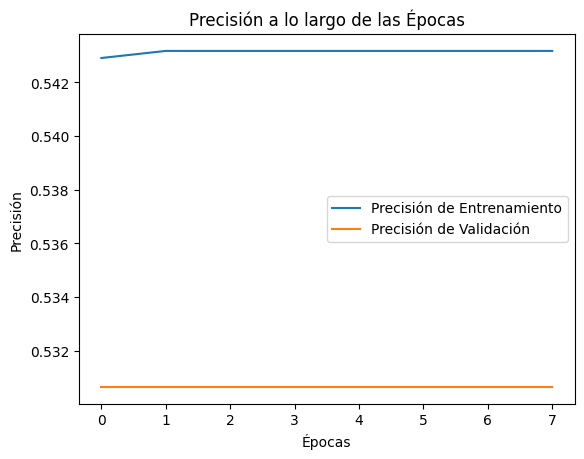

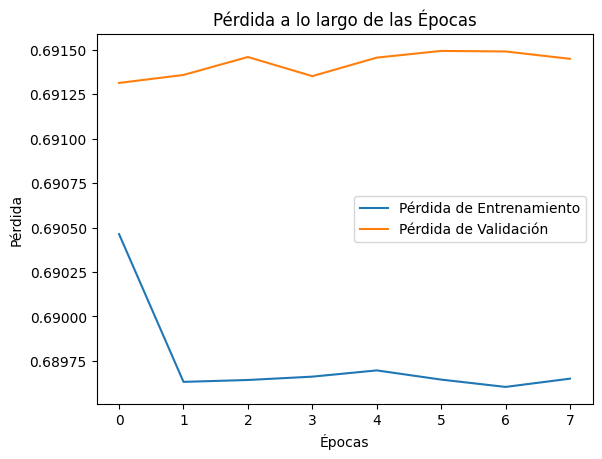

In [16]:
plot_training_history(history_MLP)

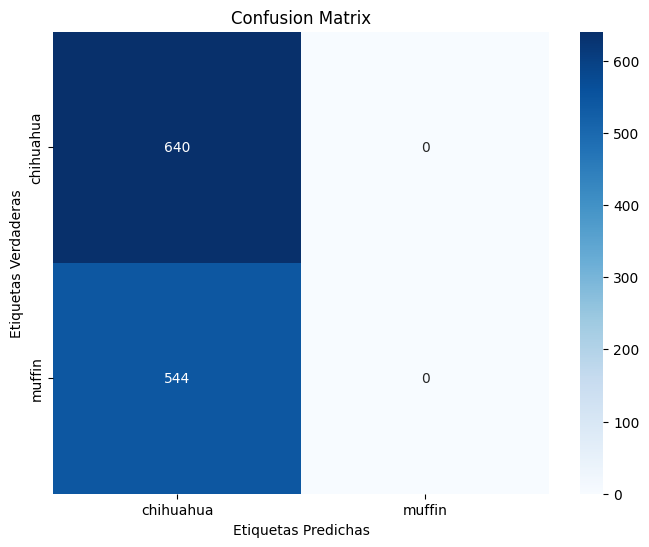

Reporte de Clasificación:
              precision    recall  f1-score   support

   chihuahua       0.54      1.00      0.70       640
      muffin       0.00      0.00      0.00       544

    accuracy                           0.54      1184
   macro avg       0.27      0.50      0.35      1184
weighted avg       0.29      0.54      0.38      1184



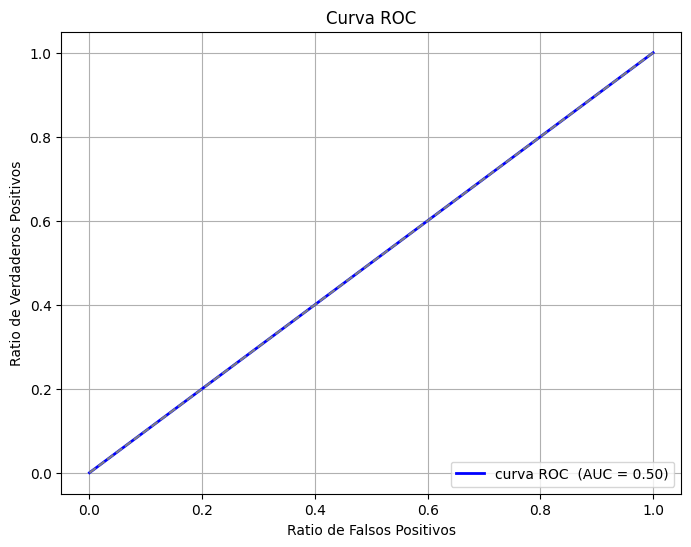

In [17]:
metricas(model_MLP)

1. La precisión en entrenamiento y prueba son casi iguales, lo que indica que no hay sobreajuste, pero también sugiere que el modelo no está aprendiendo patrones significativos para separar las clases. La precisión es muy baja, lo que indica que el modelo tiene una baja capacidad para aprender características útiles de los datos.

2. La pérdida ('loss') disminuye de manera consistente a lo largo de las épocas. Esto indica que el modelo está aprendiendo del conjunto de entrenamiento, ajustando los pesos para minimizar el error. Aunque la pérdida disminuye, esto no necesariamente implica un buen rendimiento, ya que puede estar ajustándose a los datos de entrenamiento, pero no generalizando bien a los datos de prueba.


3. Según la matriz de confusión, el modelo clasifica correctamente casi todos los ejemplos de la clase 0 (chihuahua) (640 verdaderos positivos). Sin embargo, falla completamente en la clase 1: 544 falsos negativos. Esto indica que el modelo tiene problemas de desbalance, ya que tiende a clasificar la mayoría de las muestras como 0, ignorando la clase 1.



#### 3.3.1 Modelo CNN (32, 64, 128)

In [18]:
# Definir el model
model_CNN_1 = models.Sequential([
    # Input layer
    layers.Input(shape=(img_size[0], img_size[1], 3)),
       
    # Conv layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten y Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  
])

# Compile el modelo
model_CNN_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar resumen
model_CNN_1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:

early_stopping_CNN_1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_CNN = model_CNN_1.fit(
    train_data,  
    validation_data=val_data,  
    epochs=epochs,  
    verbose=1,  
    callbacks=early_stopping_CNN_1
)

Epoch 1/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.6891 - loss: 0.6706 - val_accuracy: 0.8330 - val_loss: 0.4060
Epoch 2/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8301 - loss: 0.4059 - val_accuracy: 0.8605 - val_loss: 0.3373
Epoch 3/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8501 - loss: 0.3603 - val_accuracy: 0.8753 - val_loss: 0.2878
Epoch 4/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8808 - loss: 0.2885 - val_accuracy: 0.8499 - val_loss: 0.4369
Epoch 5/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9005 - loss: 0.2573 - val_accuracy: 0.8816 - val_loss: 0.3735
Epoch 6/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9185 - loss: 0.2159 - val_accuracy: 0.8943 - val_loss: 0.3131
Epoch 7/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9373 - loss: 0.1626 - val_accuracy: 0.8890 - val_loss: 0.3593
Epoch 8/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9413 - loss: 0.1775 - val_accuracy: 0

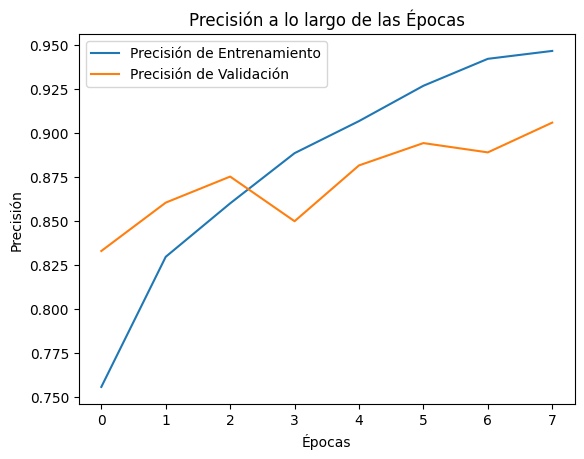

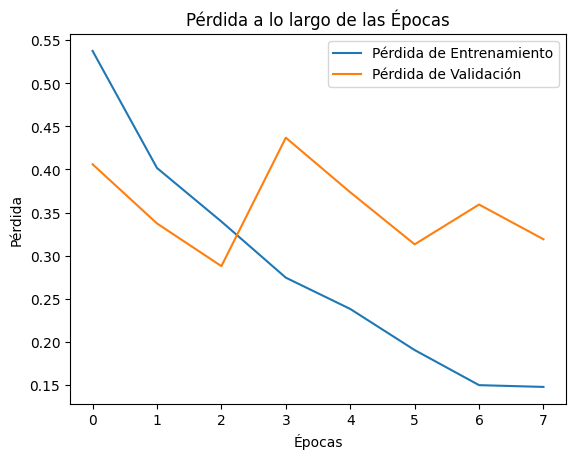

In [20]:
plot_training_history(history_CNN)

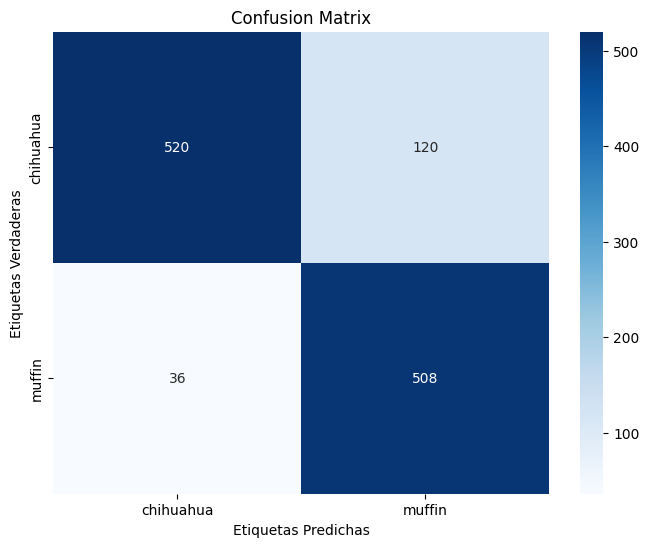

Reporte de Clasificación:
              precision    recall  f1-score   support

   chihuahua       0.94      0.81      0.87       640
      muffin       0.81      0.93      0.87       544

    accuracy                           0.87      1184
   macro avg       0.87      0.87      0.87      1184
weighted avg       0.88      0.87      0.87      1184



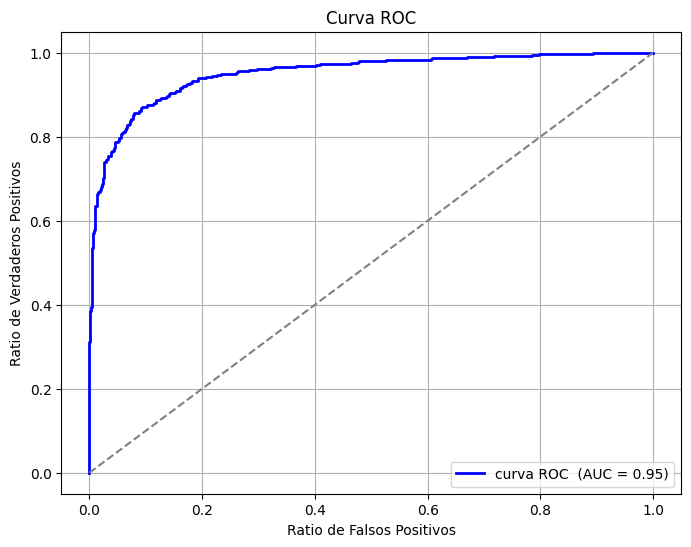

In [21]:
metricas(model_CNN_1)

1. La precisión y recall del modelo muestran un rendimiento equilibrado entre las dos clases. La precisión para "muffin" es alta (0.93), mientras que para "chihuahua" es moderada (0.84). El recall para "chihuahua" es excelente (0.95), indicando que el modelo identifica correctamente casi todos los casos de esta clase. Sin embargo, el recall para "muffin" es más bajo (0.79), lo que sugiere que el modelo tiene dificultades para identificar todos los muffins.

2. El f1-score para "chihuahua" (0.89) y "muffin" (0.85) refleja un buen equilibrio entre la precisión y el recall, lo que indica que el modelo está funcionando bien en términos generales. Aunque el rendimiento en la clase "chihuahua" es bastante alto, la clase "muffin" muestra un margen de mejora, especialmente en el recall, que es más bajo.

3. La exactitud global del modelo es del 88%, lo que refleja un buen rendimiento general. Sin embargo, el modelo tiene un sesgo leve hacia la clase "muffin", lo que se observa en el valor de precisión (0.93) frente al recall (0.79) de esa clase. El modelo clasifica correctamente la mayoría de las muestras de "chihuahua", pero no logra identificar de manera eficiente todos los muffins.

4. El AUC (Área bajo la Curva ROC) es de 0.95, lo que indica que el modelo tiene una excelente capacidad para discriminar entre las clases. Esto refleja un alto rendimiento en la clasificación binaria, donde el modelo tiene una alta probabilidad de asignar correctamente las clases en función de la probabilidad de pertenencia a cada clase.


#### 3.3.3 Modelo CNN (16,32,64,128) Con BatchNormalization

In [22]:
# Crear el modelo CNN
model_CNN_2 = models.Sequential([

layers.Input(shape=(*(img_size), 3)),
#Primera capa convolucional
layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.BatchNormalization(),  # Normalización

#Segunda capa convolucional
layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.BatchNormalization(),

#Tercera capa convolucional
layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.BatchNormalization(),

#Cuarta capa convolucional
layers.Conv2D(filters=128, kernel_size=(3, 3), activation=activation),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.BatchNormalization(),

#Se  aplana antes de pasar a la parte densa
layers.Flatten(),

#Capas densas
layers.Dense(units=128, activation=activation),
layers.Dropout(0.5),


#Capa de salida
layers.Dense(units=2, activation='softmax')
])

#Compilar el modelo
model_CNN_2.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),  
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

# Mostrar resumen
model_CNN_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,602 (3.44 MB)

 Trainable params: 901,122 (3.44 MB)

 Non-trainable params: 480 (1.88 KB)

In [23]:
early_stopping_CNN_2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_CNN_2 = model_CNN_2.fit(train_data, epochs=epochs, batch_size=batch_size, validation_data=val_data, callbacks=early_stopping_CNN_2)

Epoch 1/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.6558 - loss: 6.2673 - val_accuracy: 0.7770 - val_loss: 0.5381
Epoch 2/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7244 - loss: 0.5599 - val_accuracy: 0.7442 - val_loss: 0.6421
Epoch 3/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7139 - loss: 0.6072 - val_accuracy: 0.6142 - val_loss: 0.8252
Epoch 4/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6372 - loss: 0.6357 - val_accuracy: 0.7844 - val_loss: 0.5463
Epoch 5/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6527 - loss: 0.6255 - val_accuracy: 0.5455 - val_loss: 0.6788
Epoch 6/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6514 - loss: 0.6381 - val_accuracy: 0.7347 - val_loss: 0.6437
Epoch 7/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6708 - loss: 0.6203 - val_accuracy: 0.5328 - val_loss: 0.6941
Epoch 8/8
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6262 - loss: 0.6436 - val_accuracy: 0

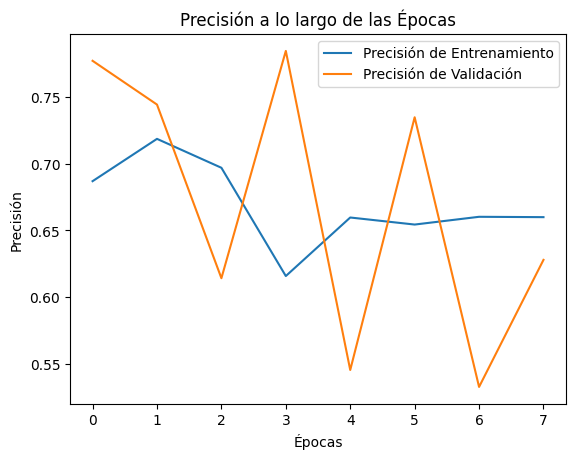

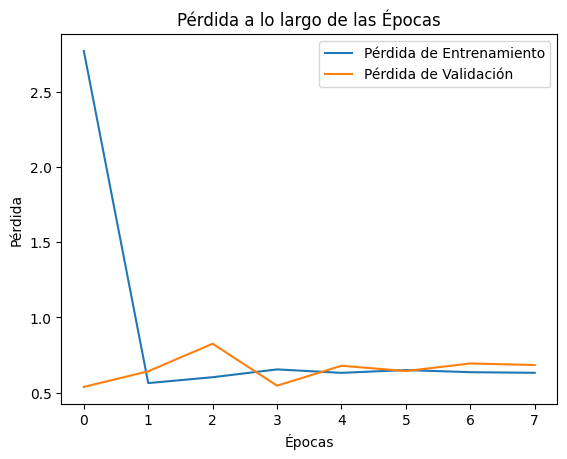

In [24]:
plot_training_history(history_CNN_2)

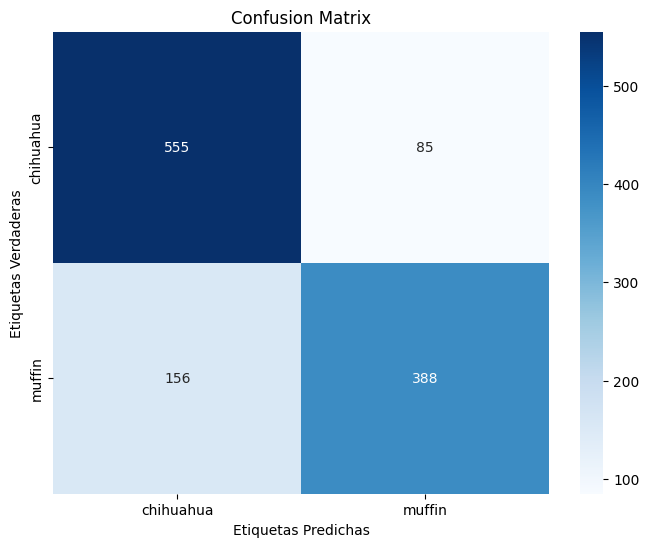

Reporte de Clasificación:
              precision    recall  f1-score   support

   chihuahua       0.78      0.87      0.82       640
      muffin       0.82      0.71      0.76       544

    accuracy                           0.80      1184
   macro avg       0.80      0.79      0.79      1184
weighted avg       0.80      0.80      0.79      1184



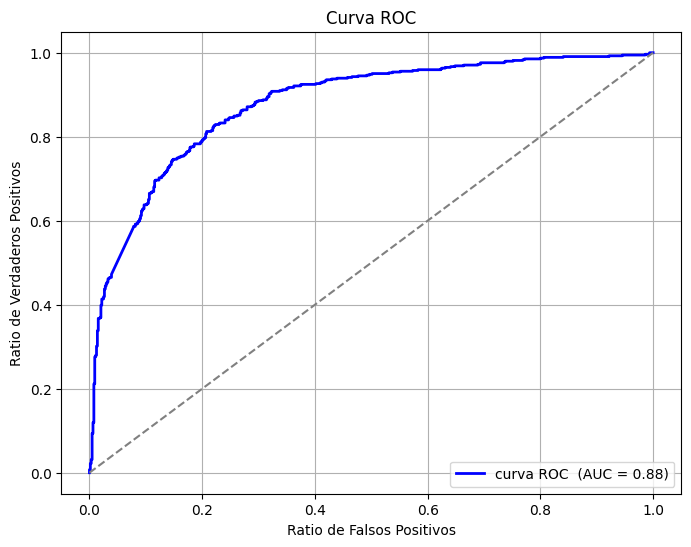

In [25]:
metricas(model_CNN_2)

1. La precisión de entrenamiento comienza alta, alcanza un pico de 0.78 y luego disminuye gradualmente, mientras que la precisión de validación sigue una tendencia similar, aunque con una disminución más pronunciada. Esto sugiere un posible sobreajuste, con el modelo rindiendo mejor en el conjunto de entrenamiento que en el de validación.

2. La precisión global es relativamente alta, oscilando entre 0.55 y 0.78, lo que indica que el modelo tiene un rendimiento razonablemente bueno tanto en el entrenamiento como en la validación.

3. La matriz de confusión muestra que el modelo clasifica correctamente 450 de 640 muestras de "chihuahua", pero clasifica incorrectamente 190 muestras de "muffin" como "chihuahua". El rendimiento general es decente, pero puede mejorar.

4. La curva ROC muestra un AUC de 0.90, lo que indica un buen rendimiento, mientras que el reporte de clasificación destaca que el modelo tiene mayor precisión para "chihuahua" (0.91) pero menor recall (0.70), y lo contrario para "muffin" (mayor recall, menor precisión). La precisión general es de 0.80.


## 4. Conclusiones

- El modelo denso no solo fue el más lento, sino que también tuvo el peor rendimiento al predecir si las imágenes contenían un muffin o un chihuahua, lo que indica que podría haber interferencia al permitir que cada nodo obtenga información de todos los demás.

- El modelo CNN de arquitectura simple presentó el mejor rendimiento frente a los otros dos modelos, pero también tenía más parámetros, lo que sugiere que esto es un factor importante en su capacidad de predicción.

- El modelo de CNN con Batch Normalization mostró una mejora directa en la predicción de muffins, pero a costa de la predicción de chihuahuas, lo cual puede no ser un cambio favorable en ciertas condiciones.

- Además, el modelo final logró un poder de predicción similar al anterior, a pesar de tener alrededor de un orden de magnitud menos parámetros, lo que puede ofrecer beneficios al utilizarse en computadoras de uso personal.
